In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt
from torchvision import datasets, transforms


In [4]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# for image, label in trainloader:
    ## do things with images and labels

Extracting /Users/beacon/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /Users/beacon/.pytorch/MNIST_data/MNIST/raw


Extracting /Users/beacon/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/beacon/.pytorch/MNIST_data/MNIST/raw


Extracting /Users/beacon/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/beacon/.pytorch/MNIST_data/MNIST/raw


Extracting /Users/beacon/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/beacon/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!





In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


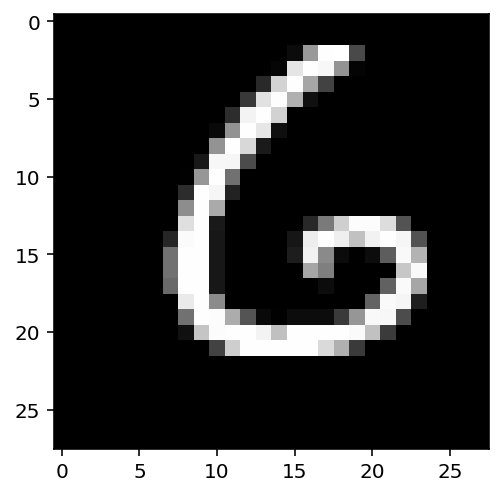

In [7]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [8]:
## Your solution
def activation(x):
    return 1/(1+torch.exp(-x))


inputs = images.view(images.shape[0], -1) # Could have put 784, -1 automatically flattens

# Make random weights with normal distrobution
W1 = torch.randn(784, 256)
B1 = torch.randn(256)

# W2 => out out is 10 numbers
W2 = torch.randn(256, 10)
B2 = torch.randn(10)

hidden = activation(torch.mm(inputs, W1) + B1)

out = torch.mm(hidden, W2) + B2 # output of your network, should have shape (64,10)

In [9]:
# Softmax gives us probabilities over all 10 numbers
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [10]:
#  nn makes all this much simpler
from torch import nn

In [11]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [12]:
# Functional Version
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [22]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        # Hidden layer with relu activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        # Output layer with softmax activation
        x = F.softmax(self.fc3(x), dim=1)
        
        return x


In [23]:
model = Network()
model

print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-2.1795e-02,  1.4071e-02, -7.6704e-05,  ...,  9.6499e-03,
          3.1763e-02, -3.0479e-02],
        [ 8.8978e-04,  3.2646e-02, -1.2562e-02,  ...,  3.3066e-02,
          3.4614e-02,  9.2850e-04],
        [ 5.9336e-03,  5.8652e-03,  1.0521e-02,  ..., -3.0359e-02,
          8.2825e-03, -2.0604e-02],
        ...,
        [ 2.6237e-02, -1.6828e-02, -1.6573e-02,  ...,  8.4902e-03,
          1.1285e-02, -3.3126e-02],
        [ 2.7957e-02, -2.3902e-02,  1.1877e-03,  ..., -3.2156e-02,
          1.9950e-02, -6.2556e-03],
        [ 3.3440e-02, -1.5198e-02,  1.2758e-02,  ..., -3.1619e-02,
         -2.1577e-02,  1.2145e-03]], requires_grad=True)
Parameter containing:
tensor([ 0.0196, -0.0030, -0.0166,  0.0313,  0.0053,  0.0225, -0.0337,  0.0212,
        -0.0028,  0.0336, -0.0212,  0.0242, -0.0128,  0.0098,  0.0112, -0.0213,
         0.0180, -0.0236, -0.0238, -0.0027,  0.0208, -0.0204, -0.0300,  0.0021,
         0.0183,  0.0213, -0.0241,  0.0230, -0.0002,  0.0103,  0

In [25]:
# forward pass
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])


In [26]:
#  nn.Sequential

# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)
